In [196]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import cv2
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
from collections import Counter
import matplotlib.pyplot as plt
import tensorflow as tf

In [197]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten,LeakyReLU
from keras.layers import Dense,Dropout,BatchNormalization

In [203]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(64,64,3)))
classifier.add(BatchNormalization())

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization())

# Adding a second convolutional layer
classifier.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='tanh'))
classifier.add(MaxPooling2D(pool_size =(2,2)))
classifier.add(BatchNormalization())


# Adding a third convolutional layer
classifier.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='tanh'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization())

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units=32,activation = 'tanh'))
classifier.add(Dense(units=64,activation = 'tanh'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=128,activation = 'tanh'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=256,activation = 'tanh'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 8,activation = 'softmax'))

In [204]:
from keras import optimizers
classifier.compile(optimizer = 'adam', loss =['categorical_crossentropy'],metrics=['accuracy'])

In [205]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen =  ImageDataGenerator(rescale = 1./255)

print("\nTraining the data...\n")

training_set = train_datagen.flow_from_directory(r'C:\Users\sathe\Satheesh_SK\No_Need\Sample_Data\Training',
                                                 target_size = (64, 64),
                                                 batch_size = 12,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory(r'C:\Users\sathe\Satheesh_SK\No_Need\Sample_Data\Testing',
                                            target_size = (64, 64),
                                            batch_size = 12,
                                            class_mode = 'categorical')


Training the data...

Found 18896 images belonging to 8 classes.
Found 2702 images belonging to 8 classes.


In [206]:
train_samples = len(training_set.filenames) 
num_classes = len(training_set.class_indices)
train_samples,num_classes

(18896, 8)

In [207]:
model = classifier.fit_generator(training_set,
                                 steps_per_epoch=600,
                                 epochs = 20,
                                 validation_data = test_set,    
                                 validation_steps = 50)

Epoch 1/20
600/600 [==============================] - 106s 173ms/step - loss: 2.0241 - accuracy: 0.2819 - val_loss: 2.7956 - val_accuracy: 0.1533
Epoch 2/20
600/600 [==============================] - 104s 173ms/step - loss: 1.6053 - accuracy: 0.4286 - val_loss: 2.9753 - val_accuracy: 0.2183
Epoch 3/20
600/600 [==============================] - 105s 175ms/step - loss: 1.4151 - accuracy: 0.4854 - val_loss: 3.0527 - val_accuracy: 0.2283
Epoch 4/20
600/600 [==============================] - 105s 174ms/step - loss: 1.3534 - accuracy: 0.5063 - val_loss: 2.8244 - val_accuracy: 0.3217
Epoch 5/20
600/600 [==============================] - 105s 175ms/step - loss: 1.3052 - accuracy: 0.5270 - val_loss: 2.8567 - val_accuracy: 0.2883
Epoch 6/20
600/600 [==============================] - 107s 178ms/step - loss: 1.2654 - accuracy: 0.5356 - val_loss: 2.9574 - val_accuracy: 0.3483
Epoch 7/20
600/600 [==============================] - 110s 183ms/step - loss: 1.2453 - accuracy: 0.5323 - val_loss: 3.1121 -

In [215]:
classifier.save('multiclass_model.h5')

In [216]:
classifier.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 64, 64, 64)        832       
_________________________________________________________________
batch_normalization_26 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 32, 32, 32)        8224      
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 16, 16, 32)      

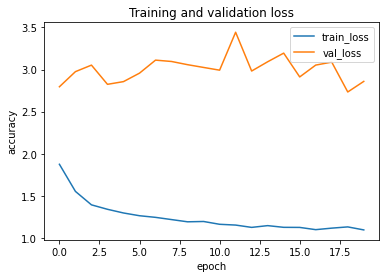

In [212]:
history = model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Training and validation loss')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()

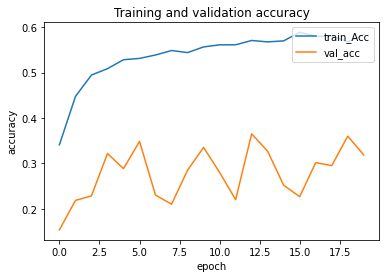

In [213]:
history = model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Training and validation accuracy')
plt.legend(['train_Acc', 'val_acc'], loc='upper right')
plt.show()

In [214]:
(eval_loss, eval_accuracy) = classifier.evaluate(test_set, batch_size=50,verbose=1)

226/226 [==============================] - 5s 20ms/step - loss: 2.9145 - accuracy: 0.3116
